<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#!pip install -U scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [ ]:
import piplite
await piplite.install('seaborn')

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [2]:
# Definindo o cabeçalho
header = [
    "Unnamed: 0", "id", "date", "price", "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above",
    "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long",
    "sqft_living15", "sqft_lot15"
]
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, names=header)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [4]:
# Display the data types of each column
df.dtypes

Unnamed: 0       float64
id                object
date              object
price             object
bedrooms          object
bathrooms         object
sqft_living       object
sqft_lot          object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above        object
sqft_basement     object
yr_built          object
yr_renovated      object
zipcode           object
lat               object
long              object
sqft_living15     object
sqft_lot15        object
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [5]:
df.describe()

,Unnamed: 0
count,21613.00000
mean,10806.00000
std,6239.28002
min,0.00000
25%,5403.00000
50%,10806.00000
75%,16209.00000
max,21612.00000


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [6]:
# Drop the columns "id" and "Unnamed: 0" from the dataframe
df.drop(["id","Unnamed: 0"],inplace=True,axis=1)
df.describe()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21614,21614,21601,21604,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614
unique,373,4029,13,30,1039,9783,7,3,6,6,13,947,307,117,71,71,5035,753,778,8690
top,20140623T000000,450000.0,3.0,2.5,1300,5000,1.0,0,0,3,7,1300,0,2014,0,98103,47.6846,-122.29,1540,5000
freq,142,172,9824,5380,138,358,10680,21450,19489,14031,8981,212,13126,559,20699,602,17,116,197,427


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [7]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [8]:
# Convertendo a coluna 'bedrooms' para numérico
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Agora você pode calcular a média e substituir os valores ausentes
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [9]:
# Convertendo a coluna 'bathrooms' para numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Agora você pode calcular a média e substituir os valores ausentes
mean_bathrooms = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


In [11]:
# Contando o número de casas com valores únicos de andares
floor_counts = df['floors'].value_counts()

# Convertendo a série em um DataFrame
floor_counts_df = floor_counts.to_frame()

# Exibindo o DataFrame
print(floor_counts_df)


        floors
1.0      10680
2.0       8241
1.5       1910
3.0        613
2.5        161
3.5          8
floors       1


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.


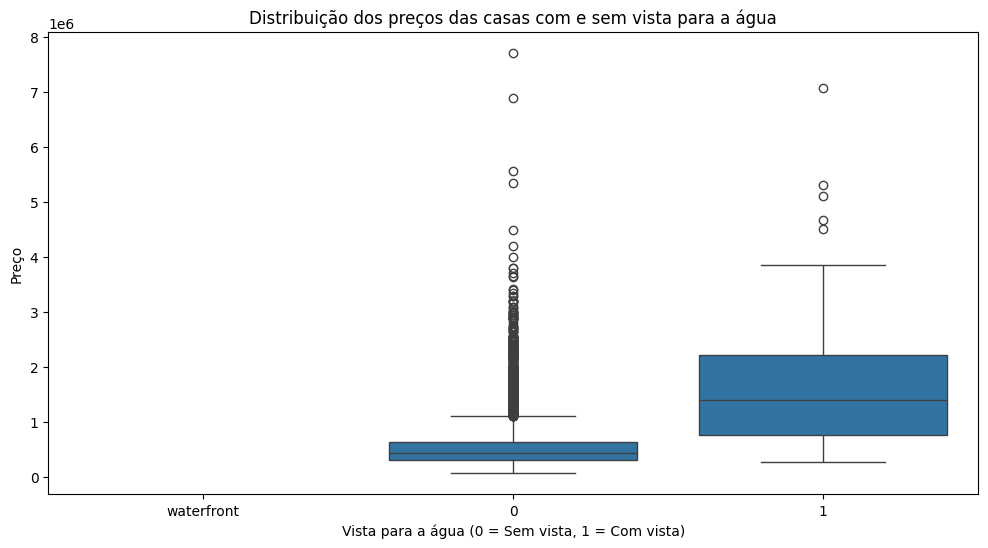

In [15]:
# Criando um gráfico de caixa para mostrar a distribuição dos preços das casas
# com e sem vista para a água
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Definindo o título do gráfico e os rótulos dos eixos
plt.title('Distribuição dos preços das casas com e sem vista para a água')
plt.xlabel('Vista para a água (0 = Sem vista, 1 = Com vista)')
plt.ylabel('Preço')

# Exibindo o gráfico
plt.show()

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.


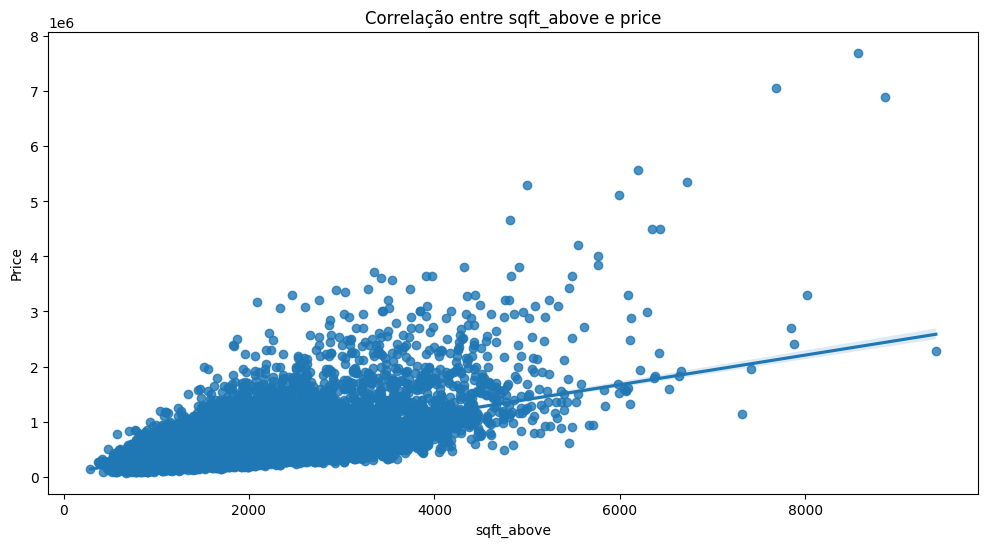

In [14]:
# Convertendo as colunas 'sqft_above' e 'price' para numérico
df['sqft_above'] = pd.to_numeric(df['sqft_above'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Agora você pode tentar criar o gráfico de regressão novamente
plt.figure(figsize=(12, 6))
sns.regplot(x='sqft_above', y='price', data=df)

plt.title('Correlação entre sqft_above e price')
plt.xlabel('sqft_above')
plt.ylabel('Price')

plt.show()


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [16]:
df.corr()['price'].sort_values()

<ipython-input-16-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


bedrooms      0.308797
bathrooms     0.525738
sqft_above    0.605567
price         1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [19]:
df['long'] = pd.to_numeric(df['long'], errors='coerce')


In [20]:
from sklearn.linear_model import LinearRegression

# Preenchendo os valores NaN na coluna 'long' com a média

df['long'].fillna(df['long'].mean(), inplace=True)
# Convertendo a coluna 'long' para numérico
df['long'] = pd.to_numeric(df['long'], errors='coerce')
# Preenchendo os valores NaN na coluna 'price' com a média
df['price'].fillna(df['price'].mean(), inplace=True)
# Convertendo a coluna 'price' para numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')


# Definindo as variáveis independentes e dependentes
X = df[['long']]
Y = df['price']

# Ajustando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X,Y)

# Calculando o R^2
score = lm.score(X, Y)
print('O R^2 é:', score)



O R^2 é: 0.00046769430149007363


### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [22]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd

# Preenchendo os valores NaN com as médias correspondentes
df = df.fillna(df.mean())

# Convertendo todas as colunas não numéricas para numéricas
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Preenchendo os novos valores NaN (resultantes da conversão para numérico) com as médias correspondentes
df = df.fillna(df.mean())


<ipython-input-22-2f4200abc3d4>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Definindo as variáveis independentes e dependentes
X = df[['sqft_living']]
Y = df['price']

# Ajustando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X,Y)

# Calculando o R^2
score = lm.score(X, Y)
print('O R^2 é:', score)


O R^2 é: 0.4928532179037931


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [27]:

# Definindo as variáveis independentes e dependentes
X = df[features]
Y = df['price']

# Ajustando o modelo de regressão linear
lm = LinearRegression()
lm.fit(X,Y)


LinearRegression()

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [28]:
# Calculando o R^2
score = lm.score(X, Y)
print('O R^2 é:', score)


O R^2 é: 0.6576951666037503


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [29]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [30]:
# Definindo as variáveis independentes e dependentes
X = df[features]
Y = df['price']

# Criando a lista de tuplas para o pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Criando o objeto de pipeline
pipe = Pipeline(Input)

# Ajustando o objeto de pipeline
pipe.fit(X,Y)

# Calculando o R^2
score = pipe.score(X, Y)
print('O R^2 é:', score)


O R^2 é: 0.7513432034159793


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3243
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [33]:
from sklearn.linear_model import Ridge

In [34]:
# Criando o objeto de regressão Ridge
ridge = Ridge(alpha=0.1)

# Ajustando o modelo aos dados de treinamento
ridge.fit(x_train, y_train)

# Calculando o R^2 usando os dados de teste
score = ridge.score(x_test, y_test)
print('O R^2 é:', score)

O R^2 é: 0.668326102123872


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [35]:
# Realizando a transformação polinomial de segunda ordem nos dados de treinamento e teste
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Criando o objeto de regressão Ridge
ridge = Ridge(alpha=0.1)

# Ajustando o modelo aos dados de treinamento transformados
ridge.fit(x_train_poly, y_train)

# Calculando o R^2 usando os dados de teste transformados
score = ridge.score(x_test_poly, y_test)
print('O R^2 é:', score)


O R^2 é: 0.7428481159372375


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
